<center>
    
### Universidade de Brasília
#### Instituto de Ciências Exatas
#### Departamento de Ciência da Computação
#### Redes de Computadores – 2025.2

# 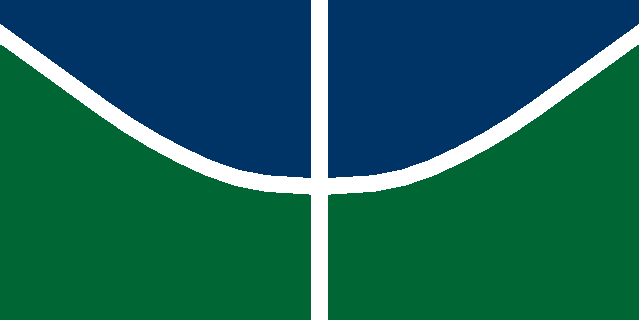


# Trabalho de Programação — Chat P2P
### Integrantes:
#### Júlia Paulo Amorim - 241039270
#### Rafael Medeiros de Alencar - 241020760
#### Samuel Philipe Domingues de Oliveira - 241002458

</center>

#### Link para a página do repositório: [pyp2p-rdv](https://github.com/leitaonerd/pyp2p-rdv/)

## 1. Requisitos Mínimos
- Python 3.10 ou superior
- Conexão com internet (para acessar o servidor Rendezvous)
- Portas TCP disponíveis


## 2. Dependências
- Não há dependências externas - o projeto usa apenas bibliotecas padrão do Python
- Bibliotecas utilizadas:
```
import json        # Para serialização de dados
import socket      # Para comunicação TCP
import threading   # Para concorrência
import logging     # Para logs do sistema
import time        # Para timestamps e delays
import requests    # Para comunicação HTTP com rendezvous
```


## 3. Instalação

1. Clone o repositório:
```bash
git clone https://github.com/leitaonerd/pyp2p-rdv.git
cd pyp2p-rdv
```

2. (Opcional) Crie um ambiente virtual:
```bash
python3 -m venv venv

# Windows
venv\Scripts\activate

# Linux/Mac
source venv/bin/activate
```


## 4. Execução do Cliente

#### Método 1: Execução Direta (Recomendado)

```bash
# No diretório raiz do projeto
python -m src.client.main
```

#### Método 2: Com arquivo de configuração

Crie um arquivo `config.json`:
```json
{
    "name": "seu_nome",
    "namespace": "CIC",
    "rendezvous_host": "pyp2p.mfcaetano.cc",
    "rendezvous_port": 8080,
    "listen_port": 6000
}
```

Execute com:
```bash
python -m src.client.main --config config.json
```

#### Método 3: Com nível de log personalizado

```bash
python -m src.client.main --log-level DEBUG
```

## Configurações Disponíveis

| Parâmetro | Padrão | Descrição |
|-----------|--------|-----------|
| `name` | `alice` | Seu nome de usuário |
| `namespace` | `CIC` | Namespace/sala do chat |
| `rendezvous_host` | `pyp2p.mfcaetano.cc` | Host do servidor Rendezvous |
| `rendezvous_port` | `8080` | Porta do servidor Rendezvous |
| `listen_port` | `6000` | Porta local para receber conexões |
| `ttl_seconds` | `7200` | Tempo de vida do registro (2h) |
| `discovery_interval` | `15.0` | Intervalo de descoberta (segundos) |
| `ping_interval` | `30.0` | Intervalo de PING (segundos) |
| `max_reconnect_attempts` | `5` | Máximo de tentativas de reconexão |



## Comandos da CLI

Uma vez que o cliente esteja rodando, você verá o prompt `pyp2p>`. Os comandos disponíveis são:

| Comando | Descrição | Exemplo |
|---------|-----------|---------|
| `/peers` | Lista todos os peers conhecidos | `/peers` |
| `/peers *` | Lista todos os peers | `/peers *` |
| `/peers #ns` | Lista peers de um namespace | `/peers #CIC` |
| `/msg <peer> <msg>` | Envia mensagem direta | `/msg bob@CIC Olá!` |
| `/pub * <msg>` | Broadcast para todos | `/pub * Olá a todos!` |
| `/pub #ns <msg>` | Mensagem para namespace | `/pub #CIC Olá CIC!` |
| `/conn` | Mostra conexões ativas | `/conn` |
| `/rtt` | Mostra latência (RTT) | `/rtt` |
| `/reconnect` | Força reconexão | `/reconnect` |
| `/log <nivel>` | Ajusta nível de log | `/log DEBUG` |
| `/help` | Mostra ajuda | `/help` |
| `/quit` | Encerra o cliente | `/quit` |


## Testando a Comunicação no Servidor

#### Passo 1: Inicie o cliente

```bash
python -m src.client.main
```

Você verá algo como:
```
[INFO] Inicializando cliente PyP2P para peer alice@CIC
[INFO] PeerServer escutando em 0.0.0.0:6000
[INFO] Registrado no rendezvous como X.X.X.X:6000
pyp2p>
```

#### Passo 2: Descubra outros peers

```
pyp2p> /peers
```

Se houver outros peers online, você verá a lista deles.

#### Passo 3: Conecte-se a um peer

```
pyp2p> /reconnect
```

Isso força a descoberta e tentativa de conexão com peers disponíveis.

#### Passo 4: Envie uma mensagem

```
pyp2p> /msg bob@CIC Olá Bob, tudo bem?
```

#### Passo 5: Envie broadcast

```
pyp2p> /pub * Mensagem para todos!
```

#### Passo 6: Verifique conexões e latência

```
pyp2p> /conn
pyp2p> /rtt
```

#### Passo 7: Encerre o cliente

```
pyp2p> /quit
```

## Testando com Dois Clientes Localmente

Para testar a comunicação P2P, você pode rodar dois clientes na mesma máquina com portas diferentes:

**Terminal 1:**
```bash
# Crie config1.json
echo {"name": "alice", "namespace": "CIC", "listen_port": 6001} > config1.json
python -m src.client.main --config config1.json
```

**Terminal 2:**
```bash
# Crie config2.json
echo {"name": "bob", "namespace": "CIC", "listen_port": 6002} > config2.json
python -m src.client.main --config config2.json
```

Agora ambos estão registrados no servidor Rendezvous. Use `/reconnect` em ambos para que eles se descubram e conectem, então teste com `/msg`.


## Troubleshooting

#### "Erro de rede com rendezvous"
- Verifique sua conexão com a internet
- Confirme que o servidor `pyp2p.mfcaetano.cc:8080` está acessível
- Tente: `ping pyp2p.mfcaetano.cc`

#### "Não foi possível iniciar PeerServer"
- A porta já está em uso. Altere `listen_port` no config.json

#### "Peer não encontrado"
- O peer pode estar offline ou em outro namespace
- Use `/peers` para ver peers disponíveis
- Use `/reconnect` para atualizar a lista

#### Nenhum peer aparece
- Pode não haver outros peers online no momento
- Teste com dois clientes localmente (veja seção acima)


## Logs e Debug

Para ver logs detalhados:
```bash
python -m src.client.main --log-level DEBUG
```

Ou durante a execução:
```
pyp2p> /log DEBUG
```

Níveis disponíveis: `DEBUG`, `INFO`, `WARNING`, `ERROR`


## Arquitetura final do sistema
```
pyp2p-rdv/
├── src/
│   ├── client/
│   │   ├── main.py                            # Inicializa aplicação e logging
│   │   ├── p2p_client.py                      # Lógica principal (registro, descoberta, reconexão, CLI)
│   │   ├── rendezvous_connection.py           # Comunicação com servidor Rendezvous
│   │   ├── peer_connection.py                 # Controle das conexões TCP e mensagens entre peers
│   │   ├── message_router.py                  # Envio e publicação de mensagens
│   │   ├── peer_table.py                      # Controle de estado e reconexões
│   │   ├── peer_server.py                     # Controle de conexões inbounds
│   │   ├── state.py                           # Armazenamento dos peers conhecidos
│   │   ├── cli.py                             # Interface de linha de comando
│   │   └── config.py                          # Configurações do cliente
│   └── tools/
│       └── rc_tester.py                       # Ferramentas de teste
└── TASKS.md                                   # Documentação
```